In [249]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import scipy.stats as stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Mouse and Drug Data input file
md_ifile = "data/mouse_drug_data.csv"

# Read the Mouse and Drug Data
md_df = pd.read_csv(md_ifile)
md_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
md_df.describe()

,Mouse ID,Drug
count,250,250
unique,249,10
top,g989,Ramicane
freq,2,25


In [6]:
# The Mouse and Drug Data has 249 unique Mouse IDs and 250 entries.
# This means one mouse ('Mouse ID' = 'g989') received 2 different Drugs at some point.
# Not sure how this will effect the analysis later, 
#  but may need to drop this Mouse ID from the analysis.
md_df['Mouse ID'].value_counts().head()

g989    2
h246    1
n304    1
b759    1
t718    1
Name: Mouse ID, dtype: int64

In [7]:
md_df.loc[ md_df['Mouse ID']=='g989' ]

,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [8]:
# OK, let's drop duplicate Mouse IDs, which will eliminate Mouse ID 'g989'
# Store the result in a new Mouse Drug Data "corrected" dataframe
md_c_df = md_df.drop_duplicates(subset='Mouse ID', keep=False)
md_c_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [9]:
# Clinical Trial Data input file
cd_ifile = "data/clinicaltrial_data.csv"

# Read the Clinical Trial Data
cd_df = pd.read_csv(cd_ifile)
cd_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
# Combine the data into a single dataset
# Perform a left merge to keep only the Clinical Trial data for which we have Mouse/Drug data
fulld_df = pd.DataFrame.merge(md_c_df, cd_df, on='Mouse ID', how="left")

In [12]:
# Display the data table for preview
fulld_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [1]:
# Combine the data into a single dataset

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [13]:
# Group by Drug and Timepoint
g_drugtime = fulld_df.groupby(by=['Drug', 'Timepoint'], as_index=False)

In [14]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_dt_df = (g_drugtime.agg(np.mean))[['Drug','Timepoint','Tumor Volume (mm3)']]

In [15]:
# Preview DataFrame
mean_dt_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [16]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_dt_df = (g_drugtime.agg(stats.sem))[['Drug','Timepoint','Tumor Volume (mm3)']]

In [17]:
# Preview DataFrame
sem_dt_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [18]:
# Minor Data Munging to Re-Format the Data Frames
# Use dataframe pivot table to reformat the mean data in a way that's easy to plot
mean_dt_pv_df = mean_dt_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

In [19]:
# Preview that Reformatting worked
mean_dt_pv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [20]:
# Use dataframe pivot table to reformat the sem data in a way that's easy to plot
sem_dt_pv_df = sem_dt_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

In [21]:
sem_dt_pv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [279]:
# 10 Markers
markers_list = ['o','v','^','<','>','s','p','*','h','X']

# 10 CSS Colors
colors_list_CSS = [ 'blue', 'green', 'red', 'brown', 'cyan', 'magenta', 'orange','lime','black','purple']

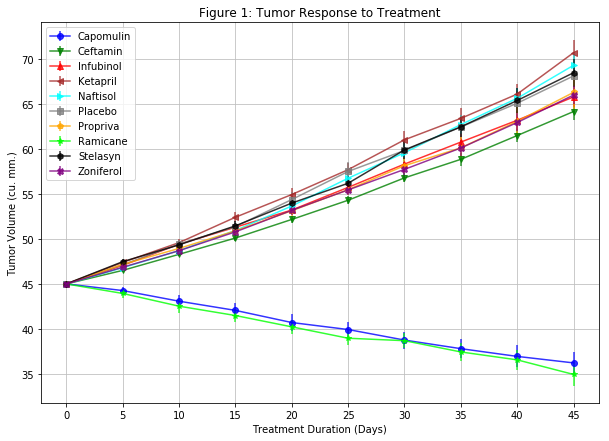

In [280]:
# Generate the plot
fig1, ax1 = plt.subplots(figsize=(10,7))

d_xvalues = range(len(mean_dt_pv_df.index))

# Generate bars by iterating through each drug
for d_i in range(len(mean_dt_pv_df.columns)):

    # Select the line marker
    d_marker = markers_list[d_i]

    # If the "drug" is "Placebo" (i.e., no drug therapy applied),
    #  then force the bar color to grey
    if mean_dt_pv_df.columns[d_i].lower() == "placebo":
        d_color = mcolors.CSS4_COLORS['grey']
    else:
        d_color = mcolors.CSS4_COLORS[colors_list_CSS[d_i]]
        
    # The values to plot for this line
    d_yvalues = mean_dt_pv_df.iloc[:,d_i]
    
    # Standard error values for error bars
    d_yerr = sem_dt_pv_df.iloc[:,d_i]
        
    # Label for this line
    d_label = mean_dt_pv_df.columns[d_i]
    
    # Plot this line
    ax1.errorbar(d_xvalues, d_yvalues, yerr=d_yerr, label=d_label, color=d_color, marker=d_marker, alpha=0.8 )
    
# Set the x-axis tick marks and tick labels
ax1.set_xticks(range(len(mean_dt_pv_df.index)))
ax1.set_xticklabels(mean_dt_pv_df.index, rotation=0)

# Set major axis labels, title, legend, grid
ax1.set_xlabel("Treatment Duration (Days)")
ax1.set_ylabel("Tumor Volume (cu. mm.)")
ax1.set_title("Figure 1: Tumor Response to Treatment")
ax1.legend(loc="best")
ax1.grid(True, axis='both', color='0.75')

plt.show()

In [281]:
# Save the Figure
fig1.savefig("results\Tumor Response to Treatment (Figure 1)")

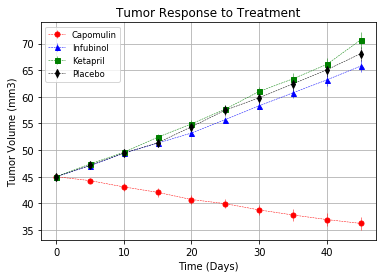

## Metastatic Response to Treatment

In [282]:
# Store the Mean Metastatic Spread data Grouped by Drug and Timepoint 
mean_dm_df = (g_drugtime.agg(np.mean))[['Drug','Timepoint','Metastatic Sites']]

In [283]:
mean_dm_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [284]:
# Store the Standard Error of Metastatic Spread Grouped by Drug and Timepoint
sem_dm_df = (g_drugtime.agg(stats.sem))[['Drug','Timepoint','Metastatic Sites']]

In [285]:
sem_dm_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [286]:
# Use dataframe pivot table to reformat the mean data in a way that's easy to plot
mean_dm_pv_df = mean_dm_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

In [287]:
mean_dm_pv_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


In [288]:
# Use dataframe pivot table to reformat the sem data in a way that's easy to plot
sem_dm_pv_df = sem_dm_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

In [289]:
sem_dm_pv_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378


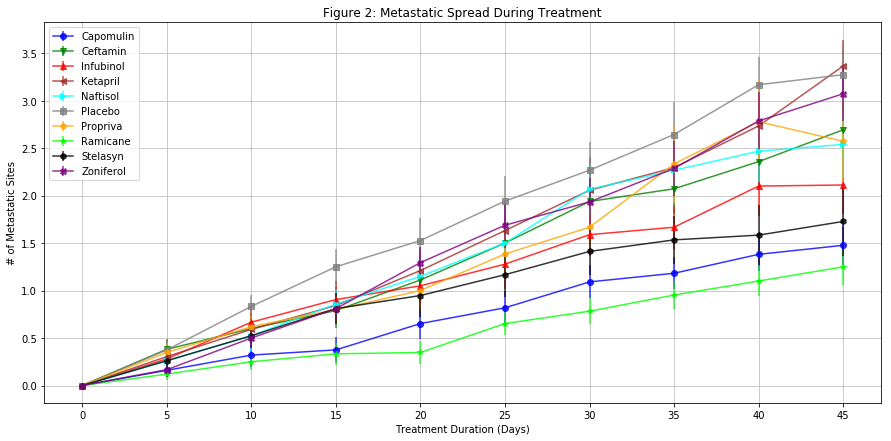

In [293]:
# Generate the plot
fig2, ax2 = plt.subplots(figsize=(15,7))

d_xvalues = range(len(mean_dm_pv_df.index))

# Generate bars by iterating through each drug
for d_i in range(len(mean_dm_pv_df.columns)):

    # Select the line marker
    d_marker = markers_list[d_i]

    # If the "drug" is "Placebo" (i.e., no drug therapy applied),
    #  then force the bar color to grey
    if mean_dm_pv_df.columns[d_i].lower() == "placebo":
        d_color = mcolors.CSS4_COLORS['grey']
    else:
        d_color = mcolors.CSS4_COLORS[colors_list_CSS[d_i]]
        
    # The values to plot for this line
    d_yvalues = mean_dm_pv_df.iloc[:,d_i]
    
    # Standard error values for error bars
    d_yerr = sem_dm_pv_df.iloc[:,d_i]
        
    # Label for this line
    d_label = mean_dm_pv_df.columns[d_i]
    
    # Plot this line
    ax2.errorbar(d_xvalues, d_yvalues, yerr=d_yerr, label=d_label, color=d_color, marker=d_marker, alpha=0.8 )

# Set the x-axis tick marks and tick labels
ax2.set_xticks(range(len(mean_dm_pv_df.index)))
ax2.set_xticklabels(mean_dm_pv_df.index, rotation=0)

# Set major axis labels, title, legend, grid
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("# of Metastatic Sites")
ax2.set_title("Figure 2: Metastatic Spread During Treatment")
ax2.legend(loc="best")
ax2.grid(True, axis='both', color='0.75')

plt.show()

In [294]:
# Save the Figure
fig2.savefig("results\Metastatic Spread During Treatment (Figure 2)")

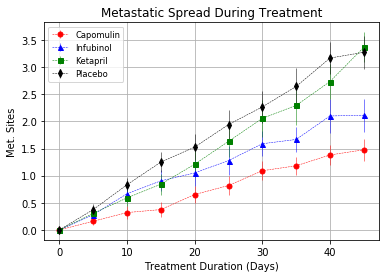

## Survival Rates

In [297]:
# Store the Count of Mice Grouped by Drug and Timepoint (can pass any metric)
count_m_df = pd.DataFrame(data=g_drugtime.apply(len), columns=["# Living Mice"]).reset_index()
count_m_df.head()

# WHY: Did i need to reset the indices before the pivot table would behave correctly below?

,Drug,Timepoint,# Living Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [298]:
# Calculate the survival rate
count_m_df['Survival Rate'] = (count_m_df['# Living Mice'] / count_m_df['# Living Mice'].max()) * 100.0
count_m_df.head()

,Drug,Timepoint,# Living Mice,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [299]:
survival_pv_df = count_m_df.pivot(index='Timepoint', columns='Drug', values='Survival Rate')
survival_pv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,96.0,100.0,96.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,92.0,100.0,92.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,84.0,96.0,84.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,60.0,96.0,84.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,60.0,92.0,76.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,52.0,92.0,72.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,48.0,92.0,68.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,36.0,84.0,60.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


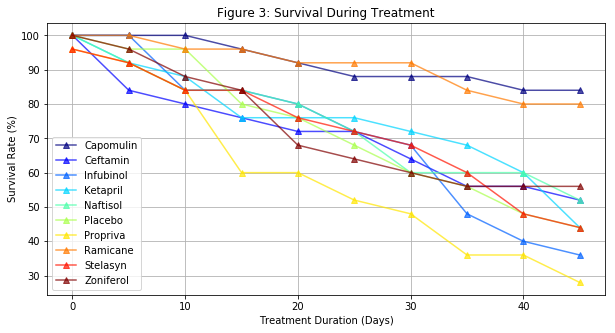

In [300]:
# Generate the plot
ax3 = survival_pv_df.plot(style = '^-', grid=True, figsize=(10,5), colormap='jet', alpha=0.7)
fig3=ax3.get_figure()

ax3.set_xlabel("Treatment Duration (Days)")
ax3.set_ylabel("Survival Rate (%)")
ax3.set_title("Figure 3: Survival During Treatment")
ax3.legend(loc="best")

plt.show()

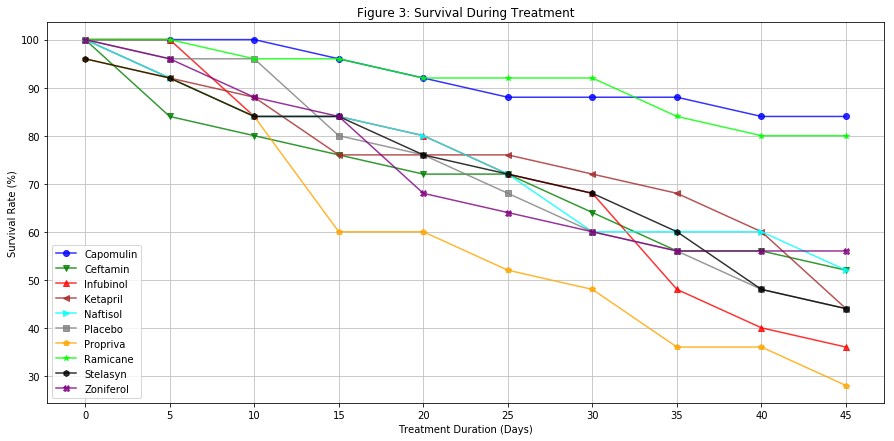

In [303]:
# Generate the plot
fig3, ax3 = plt.subplots(figsize=(15,7))

d_xvalues = range(len(survival_pv_df.index))

# Generate bars by iterating through each drug
for d_i in range(len(survival_pv_df.columns)):

    # Select the line marker
    d_marker = markers_list[d_i]

    # If the "drug" is "Placebo" (i.e., no drug therapy applied),
    #  then force the bar color to grey
    if survival_pv_df.columns[d_i].lower() == "placebo":
        d_color = mcolors.CSS4_COLORS['grey']
    else:
        d_color = mcolors.CSS4_COLORS[colors_list_CSS[d_i]]
        
    # The values to plot for this line
    d_yvalues = survival_pv_df.iloc[:,d_i]
    
    # Label for this line
    d_label = survival_pv_df.columns[d_i]
    
    # Plot this line
    ax3.plot(d_xvalues, d_yvalues, label=d_label, color=d_color, marker=d_marker, alpha=0.8 )

#ax3 = survival_pv_df.plot(style = '^-', grid=True, figsize=(10,5), colormap='jet', alpha=0.7)
    
# Set the x-axis tick marks and tick labels
ax3.set_xticks(range(len(survival_pv_df.index)))
ax3.set_xticklabels(survival_pv_df.index, rotation=0)

# Set major axis labels, title, legend, grid
ax3.set_xlabel("Treatment Duration (Days)")
ax3.set_ylabel("Survival Rate (%)")
ax3.set_title("Figure 3: Survival During Treatment")
ax3.legend(loc="best")
ax3.grid(True, axis='both', color='0.75')

plt.show()

In [304]:
# Save the Figure
fig3.savefig("results\Survival During Treatment (Figure 3)")

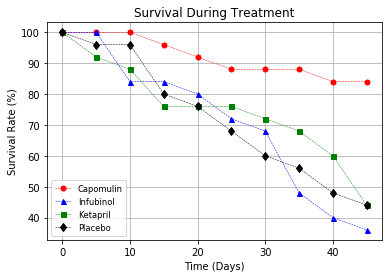

## Summary Bar Graph

In [305]:
# Calculate the percent changes for each drug
# Display the data to confirm

In [306]:
mean_dt_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [307]:
chg_df = pd.DataFrame(index=set(mean_dt_df['Drug']) )
chg_df

""
Ketapril
Capomulin
Stelasyn
Zoniferol
Naftisol
Ceftamin
Placebo
Infubinol
Propriva
Ramicane


In [308]:
# Find the mean tumor volume at the start of the clinical trials
start_val_df = (mean_dt_df[ mean_dt_df['Timepoint'] == mean_dt_df['Timepoint'].min() ]).set_index(['Drug']).filter(['Drug','Tumor Volume (mm3)'])
start_val_df.head()

,Tumor Volume (mm3)
Drug,
Capomulin,45.0
Ceftamin,45.0
Infubinol,45.0
Ketapril,45.0
Naftisol,45.0


In [309]:
# Find the mean tumor volume at the end of the clinical trials
end_val_df = (mean_dt_df[ mean_dt_df['Timepoint'] == mean_dt_df['Timepoint'].max() ]).set_index(['Drug']).filter(['Drug','Tumor Volume (mm3)'])
end_val_df.head()

,Tumor Volume (mm3)
Drug,
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Ketapril,70.662958
Naftisol,69.265506


In [310]:
# Calculate the % Tumor Volume Change
# end_val_df['Tumor Volume (mm3)'] - start_val_df['Tumor Volume (mm3)']
chg_df['% Tumor Volume Change'] = 100.0 * ( end_val_df - start_val_df ) / start_val_df
chg_df.head()

,% Tumor Volume Change
Ketapril,57.028795
Capomulin,-19.475303
Stelasyn,52.085134
Zoniferol,46.579751
Naftisol,53.923347


In [311]:
# Sort the results from low-to-high by % Tumor Volume Change
chg_df.sort_values(['% Tumor Volume Change'], inplace=True)
chg_df.head()

,% Tumor Volume Change
Ramicane,-22.320900
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Zoniferol,46.579751


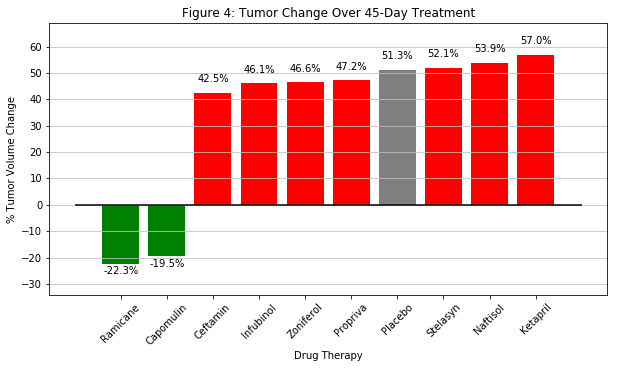

In [312]:
# Generate the plot
fig4, ax4 = plt.subplots(figsize=(10,5))

# Generate bars by iterating through each drug
for d_i in range(len(chg_df.index)):

    # Pick the bar color and value placement based upon % change
    if chg_df.iloc[d_i,0] < 0.0:
        d_color = 'g'
        d_textloc = chg_df.iloc[d_i,0] - 4
    else:
        d_color = 'r'
        d_textloc = chg_df.iloc[d_i,0] + 4

    # If the "drug" is "Placebo" (i.e., no drug therapy applied),
    #  then force the bar color to grey instead of red or green
    if chg_df.index[d_i].lower() == "placebo":
        d_color = '0.5'
        
    # Get the value associated with this bar
    d_valuetext = f"{chg_df.iloc[d_i,0]:.1f}%"
        
    # Plot a bar
    plt.bar(d_i, chg_df.iloc[d_i,0], color=d_color)
    
    # Place the value on this bar
    plt.text(d_i, d_textloc, d_valuetext , ha='center')

plt.xticks(range(len(chg_df.index)), chg_df.index, rotation=45)

# Set the y access limits to add room for the value labels
y_bot = chg_df['% Tumor Volume Change'].min()
y_top = chg_df['% Tumor Volume Change'].max()
y_range = y_top-y_bot

y_bot -= y_range * 0.15
y_top += y_range * 0.15
plt.ylim( bottom=y_bot, top=y_top)

# Adjust the tick marks to be more granular
plt.yticks(np.arange(round(y_bot,-1),round(y_top,-1),step=10))

plt.xlabel("Drug Therapy")
plt.ylabel("% Tumor Volume Change")
plt.title("Figure 4: Tumor Change Over 45-Day Treatment")

plt.grid(True, axis='y', color='0.75')
# plt.legend(loc="best")

# Add a horizontal line at the y = 0% level
plt.hlines(y=0, xmin=-1, xmax=10)

plt.show()

In [313]:
# Save the Figure
fig4.savefig("results\Survival During Treatment (Figure 4)")

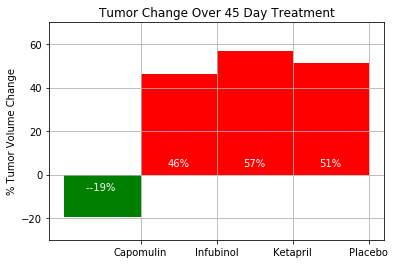